# Re-doing the Iris analysis

## Introduction

In this notebook I will re-do the Iris data analysis using a support vector machine as classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a support vector machine.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question
Are length & width of petals significant enough to determine the species?
Or might length & width of sepal be more suitable to determine the species?

## Analysis
Aim is to figure out if its better to assign a flower to its species with help of petal data or sepal data.


### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [10]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import iris dataset
iris = datasets.load_iris()

Automatically created module for IPython interactive environment


### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [25]:
#############################################
#PETAL
#############################################

# Take the first two features. We could avoid this by using a two-dim dataset
#Learning process
X = iris.data[:, 2:4] #Define which columns are needed 
#print(X.shape)
y = iris.target
#print(y.shape)

#############################################
#SEPAL
#############################################

# Take the first two features. We could avoid this by using a two-dim dataset
#Learning process
X2 = iris.data[:,:2] #Define which columns are needed 
#print(X.shape)
y2 = iris.target
#print(y.shape)

### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

In [ ]:
#To do: Slice the data of iris data set into two parts to get one for training and one for testing
#############################################
#PETAL
#############################################
Train = X

### 4. fit the model using the train set, applying the support vector machine
[_describe how you are going to fit the model and what model parameters you are using_]

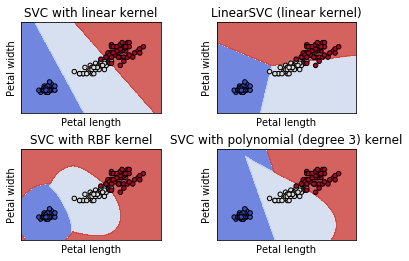

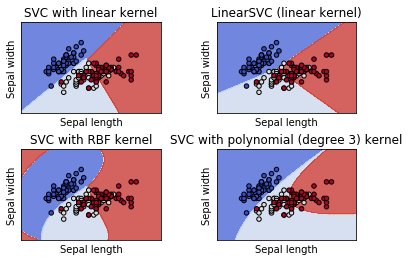

In [28]:
#############################################
#PETAL
#############################################

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #print(y)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#############################################
#SEPAL
#############################################

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X2, y2) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #print(y)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

## Discussion of result
[_ reflect on the accuracy of your result and whether you have properly answered your research question _]

In the lower four diagrams above you can see that the species assigned by sepals cannot be separated clear. 
In comparison to the upper for diagrams about the petal you can see that the species are clearly separated.

Answer of the research question: Petal width and length are even better to measures to define the species than sepals are.